###    Simple  Statistical Data Analysis and Visulisation 
In this task, the basic statistic analysis are done in the iris flower data set. The main reason behind doing this task  is to learn about the outliers, correlation, feature reduction, etc. with in the features in dataset. And, of course learning and exploring the python statistical libraries such as numpy, pandas, scipy, matplotlib, etc. And, the feature reduction method like PCA and FactorAnlysis are also introduced.

In [2]:
#import all essential libraries
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from urllib  import request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os



### Load Data From url

In [41]:

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
coln_name = ['sepal-length', 'sepal-width', 'petal-length','petal-width','Flower_Name']
iris_data = request.urlopen(url)
df =  pd.read_csv(iris_data, delimiter=',', names=coln_name ) # pandas dataframe
df.head() # display first 5 rows



,sepal-length,sepal-width,petal-length,petal-width,Flower_Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
#show the statistical descriptive of dataset
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Histrogram Plot

In the section, the four methods(Sturges, Scott, Square root, and Freedman-Diaconis) were used to plot the histgram and compare the bins among the these methods. The Square root method has higest bin number i.e 8 and lowest one is 6 bin number from Scott method. Another part has been done in this section is making of histrogram of sepal_length from all species and compared how the values are distributed. It is noticed that high frequency of sepal_length in setosa is at around 5 cm,  in virginica is at around 5.5 cm and in versicolor is 6.5-7 cm. And,I have compare three species with sepal length. It is noticed  that setosa has lower sepal_length, and veriginica and versicolor appear almost the same of sepal_length. Thus, to classify setosa with other species  by looking this histogram  seems pretty easy but between virginica and versicolor is difficult since they looks pretty same to each other.


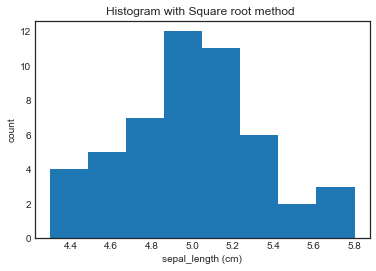

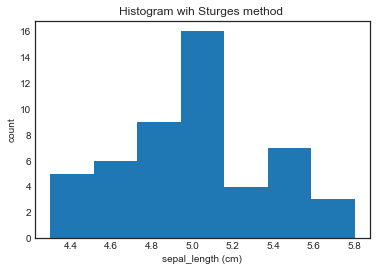

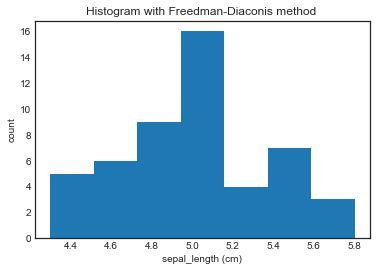

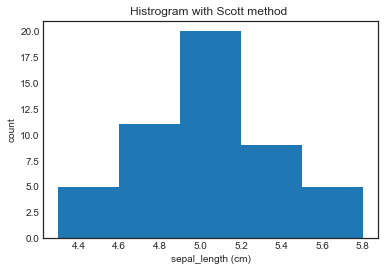




Compare the values(sepal length) distribution in three species:



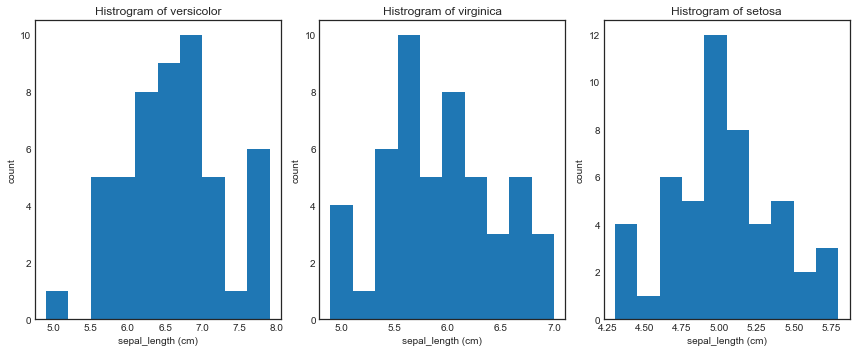

In [105]:
 '''======     Histogram plot    ======== '''

'''Select one attribute for species Iris setosa. Plot four different histograms using different methods'''


#calcualte IQR
'''IQR =  np.percentile(setosa_sepal_length, 75, interpolation='higher') 
- np.percentile(setosa_sepal_length, 25, interpolation='lower')'''



                                                            

#select first attribute of Iris-setosa
iris_setosa_only = df[df['Flower_Name']=='Iris-setosa']
setosa_sepal_length1 = iris_setosa_only.iloc[:,0]  # first attributes


#Histogram using square root method
#compute number of data point

plt.hist(setosa_sepal_length, bins='sqrt')
plt.title('Histogram with Square root method ')
plt.xlabel('sepal_length (cm)')
plt.ylabel('count')
plt.style.use('seaborn-white')
plt.show()


#Histogram using Sturges method
#n_bin = int(np.log2 (n_data) +1)
#print(n_bin)
plt.hist(setosa_sepal_length, bins='sturges')
plt.title('Histogram wih Sturges method ')
plt.xlabel('sepal_length (cm)')
plt.ylabel('count')
plt.show()


#Histogram using Freedman-Diaconis method
plt.hist(setosa_sepal_length, bins='fd')
plt.title('Histogram with Freedman-Diaconis method ')
plt.xlabel('sepal_length (cm)')
plt.ylabel('count')
plt.show()


#Histogram using  Scott method
plt.hist(setosa_sepal_length, bins='scott')
plt.title('Histrogram with Scott method ')
plt.xlabel('sepal_length (cm)')
plt.ylabel('count')
plt.show()





''' ====    plot histrogram for same feature of three different species ===== '''
# plot attribute for Iris virginica and Iris versicolor
virginica_only = df[df['Flower_Name']=='Iris-virginica']
versicolor_only = df[df['Flower_Name']=='Iris-versicolor']



#select first attribute of Iris virginica and Iris versicolor
virginica_sepal_length = virginica_only.iloc[:,0]  # first attributes
versicolor_sepal_length = versicolor_only.iloc[:,0]


#create three histrogram for three species and compare the values distrubution
print('\n\n\nCompare the values(sepal length) distribution in three species:\n')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,5))
ax1.set_title('Histrogram of versicolor')
ax1.hist(virginica_sepal_length)

ax2.set_title('Histrogram of virginica' )
ax2.hist(versicolor_sepal_length)

ax3.set_title('Histrogram of setosa')
ax3.hist(setosa_sepal_length1)


# name xlable and ylable three histrogram
for ax in (ax1, ax2, ax3):
    ax.set_xlabel('sepal_length (cm)')
    ax.set_ylabel('count')
    
plt.tight_layout()
plt.show()
    
    
    

    

### Boxplot plot

In boxplot diagram, some outliers in sepal_width(second attribute) were found. In sepal_lenght, data are not seen that much skewed since median cut almost the middle part in the box, which means it looks like symmetric, while in petal_length and petal_width, the  data are skewed in lower part from median. 

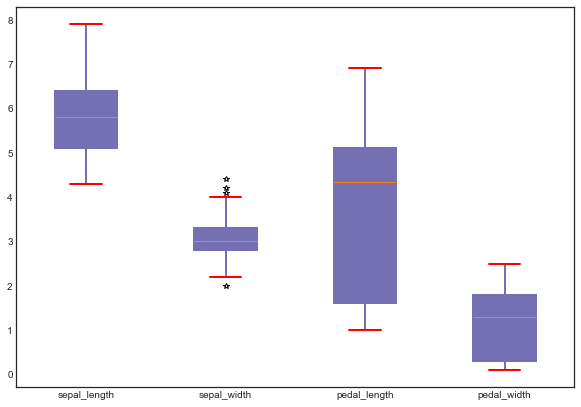

In [112]:
'''=== Produce boxplot plots of attributes. Find the outliers if in dataset === '''

#create the figure instance
fig, ax = plt.subplots(1, figsize = (10,7))

#select attributes 
data_to_plot = [df['sepal-length'], df['sepal-width'], df['petal-length'], df['petal-width']]
bp = ax.boxplot(data_to_plot, patch_artist=True)
              
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    

#change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='red', linewidth=2)

#change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='*')
    
#Custom x-axis labels
ax.set_xticklabels(['sepal_length', 'sepal_width', 'pedal_length', 'pedal_width'])
plt.show()


### Correlation Calcualtion

In the persion correlation table, speal_length has high postive correlation with petal_length and petal_width (i.e.0.871754 and  0.817954 repectively) while speal_legth has negative correlation with sepal_width. The higest correlation is  0.962757 between petal_width(f3) and petal_length(f2). And the higest negative correlation is 
-0.420516 between the sepal_width and petal_width.

Person Correlation: 
               sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000 

Kendall Correlation: 
               sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.072112      0.717624     0.654960
sepal-width      -0.072112     1.000000     -0.182391    -0.146988
petal-length      0.717624    -0.182391      1.000000     0.803014
petal-width       0.654960    -0.146988      0.803014     1.000000 

Spearman Correlation: 
               sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.159457      0.881386     0.834421
sepal-width      -0.159457     1.000000     -0.303421    -0.277511
petal-length      0.881386    -0.303421      1.000000   

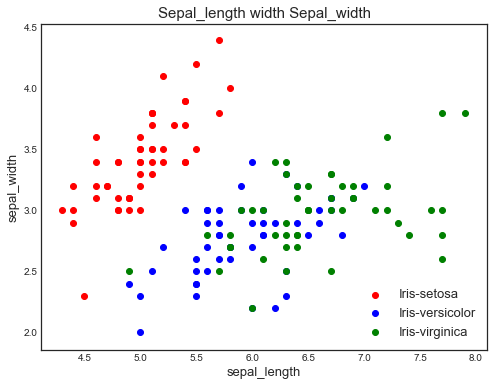

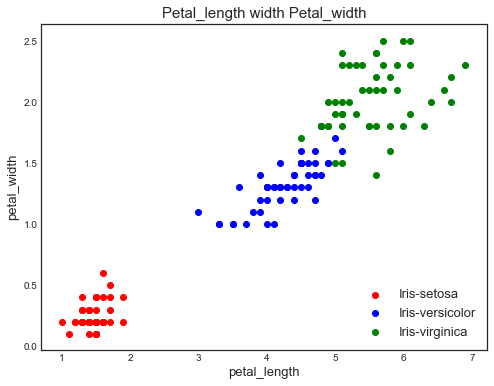

In [123]:
''' === computer correlation between features using different methods (pearson,kendall, spearman) === '''

print('Person Correlation: \n', df.corr(method='pearson'),'\n')
print('Kendall Correlation: \n', df.corr(method='kendall'),'\n')
print('Spearman Correlation: \n', df.corr(method='spearman'),'\n')




'''==== produce scatter plot bettween sepal_length and sepal_width ===='''

#flower category
targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']

#color indication  for specific flower
colors = ['red', 'blue','green']

#create figure
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Sepal_length width Sepal_width',fontsize = 15)
plt.xlabel('sepal_length', fontsize = 13)
plt.ylabel('sepal_width', fontsize = 13)

#check each flower and assign color as indication 
for target, color in zip(targets,colors):
    indx = df['Flower_Name']== target
    x = df.loc[indx,'sepal-length'] #sepal_length in x-axis
    y = df.loc[indx,'sepal-width'] #sepal_width in y-axis
    ax.scatter(x, y, c = color, marker='o', label=target)
plt.legend(loc=4, fontsize = 13)
plt.show()





#scatter plot between petal_length and petal_width
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Petal_length width Petal_width',fontsize = 15)
plt.xlabel('petal_length', fontsize = 13)
plt.ylabel('petal_width', fontsize = 13)

#check each flower and assign color
for target, color in zip(targets,colors):
    indx = df['Flower_Name']== target
    ax.scatter(df.loc[indx,'petal-length'], df.loc[indx,'petal-width'], c = color, marker='o', label=target)


plt.legend(loc=4, fontsize = 13)
plt.show()



### Principal Component Analysis(PCA)

In the PCA, the 4 dimensions data is converted into 2 dimension, which  can be seen in the below section. And, the expalined variation ratio is observed  using function- 'data_in_two_dimension.explained_variance_ratio' which  showed that  0.72770452 (i.e. 73% of total variance) is attributed by the first component while  0.23030523 (i.e.23% of total variance) is attributed by the2nd component. This explained variation tells us how much information(variance) can attributed by each new components. Thus, total information contained by two new components together is (73+23 = 96%). This means about 96% of information(variation) of orignal data set can be  explained by the new features.


New data framw with out standarization: 
    1st Component  2nd Component
0      -2.684207       0.326607
1      -2.715391      -0.169557
2      -2.889820      -0.137346
3      -2.746437      -0.311124
4      -2.728593       0.333925 

New data framw with standarization: 
    1st Component  2nd Component
0      -2.264542       0.505704
1      -2.086426      -0.655405
2      -2.367950      -0.318477
3      -2.304197      -0.575368
4      -2.388777       0.674767 

After concatination with f4: 
    1st Component  2nd Component  Flower_Name
0      -2.684207       0.326607  Iris-setosa
1      -2.715391      -0.169557  Iris-setosa
2      -2.889820      -0.137346  Iris-setosa
3      -2.746437      -0.311124  Iris-setosa
4      -2.728593       0.333925  Iris-setosa 



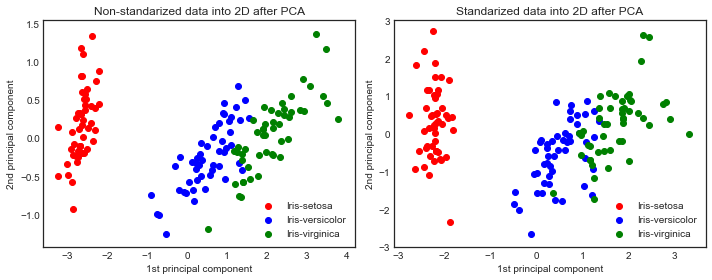

array([ 0.72770452,  0.23030523])

In [124]:
'''=== Principal component analysis (PCA) with and without z-score normalization  ==='''




#select features and flower name separately  
features = df.iloc[:,0:4]
flowers  = df.iloc[:,4]



#project data in two dimensions 
data_in_two_dimension = PCA(n_components=2)

#Fit to data, then transform it
principalComponents = data_in_two_dimension.fit_transform(features)

#change to pandas dataframe
New_PCA_data1 = pd.DataFrame(data = principalComponents
             , columns = ['1st Component', '2nd Component'])
print('New data framw with out standarization: \n',New_PCA_data1.head(), '\n')


# Features scaling standarization
standarized_form = StandardScaler().fit_transform(features)


###project data in two dimensions with standarized data
principalComponent1 = data_in_two_dimension.fit_transform(standarized_form)
New_PCA_data2 = pd.DataFrame(data = principalComponent1
            , columns = ['1st Component', '2nd Component'])
print('New data framw with standarization: \n',New_PCA_data2.head(),'\n')





#visualise on 2D projection using scatter plots
#combine the new 2D data non-standarised with flowers column
final_df1 = pd.concat([New_PCA_data1, flowers], axis = 1)
final_df2 = pd.concat([New_PCA_data2, flowers], axis = 1)
print('After concatination with f4: \n', final_df1.head(),'\n')




#creates figure
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

#flower category 
targets= ['Iris-setosa','Iris-versicolor','Iris-virginica']

#color indication  for specific flower
colors = ['red', 'blue','green']


#check each flower and assign color as indication 
for target, color in zip(targets, colors):
    indx = final_df1['Flower_Name']== target
    ax1.scatter(final_df1.loc[indx,'1st Component'], final_df1.loc[indx,'2nd Component'],
               c = color, marker='o', label=target)


for target, color in zip(targets, colors):
    indx = final_df2['Flower_Name']== target
    ax2.scatter(final_df2.loc[indx,'1st Component'], final_df2.loc[indx,'2nd Component'],
               c = color, marker='o', label=target)    

    
for ax in (ax1,ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc=4)
    
ax1.set_title('Non-standarized data into 2D after PCA')
ax2.set_title('Standarized data into 2D after PCA')
plt.tight_layout()
plt.show()


#Explained variance
data_in_two_dimension.explained_variance_ratio_



### Exploratory factor analysis


In Factor anlysis method, the latent variables(factors) which explain the pattern of observed varibles are looked for.
Factors are the unobservable values  those are found from the oberserved variables based on their correlation. Thus, in this method, the variables in dataset those are highly correlated with each other are placed in one group is known as one factor and other variables correalted with other varibales are grouped in another group  is known as another factor and keep finding factor in such manner. 

As for example, if a dataset has five variables(v1,v2,v3,v4, and v5).  Among them lets say if v1, v2, v5 has high correlation then they are place in one group, called one factor,  and similarly if v2 and v4 have high correlation then thery are placed into another group(factor) and  so on. Thus,  these factors are smaller in number as compared to orginal dimension of dataset. And, it is found that almost the same output were observed when comparing PCA and FA scatter plot.

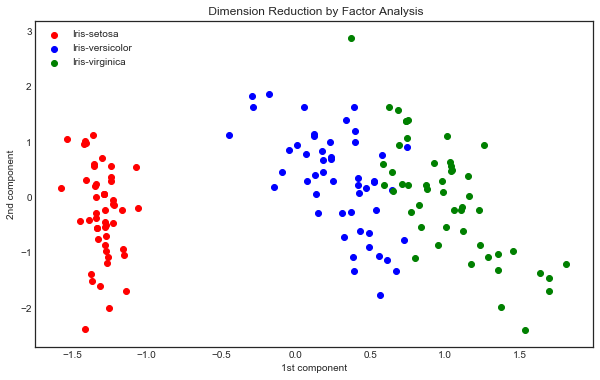

In [126]:
'''===== Feature dimension reduction with factor analysis  ======'''

#decompose data in two dimensions 
transformer = FactorAnalysis(n_components=2)

#Fit to data, then transform it
factor = transformer.fit_transform(features) 
#print(factor)

# change to pandas dataframe
new_features= pd.DataFrame(data = factor, columns = ['f1', 'f2'])


#concatanate new features with flower species horizontally
new_df = pd.concat([new_features, flowers], axis=1)
#print(new_df)



## create scatter plot for new features
targets= ['Iris-setosa','Iris-versicolor','Iris-virginica'] #flower category 
colors = ['red', 'blue','green'] #color indication  for specific flower


#create figure
fig, ax = plt.subplots(1, figsize=(10,6))

#plots new attributes in two dimension 
for target, color in zip(targets, colors):
    indx = new_df['Flower_Name']== target
    x = new_df.loc[indx,'f1']
    y = new_df.loc[indx,'f2']
    ax.scatter(x, y, c = color, marker='o', label=target)
    
    
ax.set_title(' Dimension Reduction by Factor Analysis')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
plt.legend(loc=2)
plt.show()
